# Lecture

In [229]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [230]:
def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    if not tarball_path.is_file():
        Path('datasets').mkdir(parents=True, exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [231]:
housing = load_housing_data()

In [232]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [233]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [234]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [235]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [236]:
import matplotlib.pyplot as plt

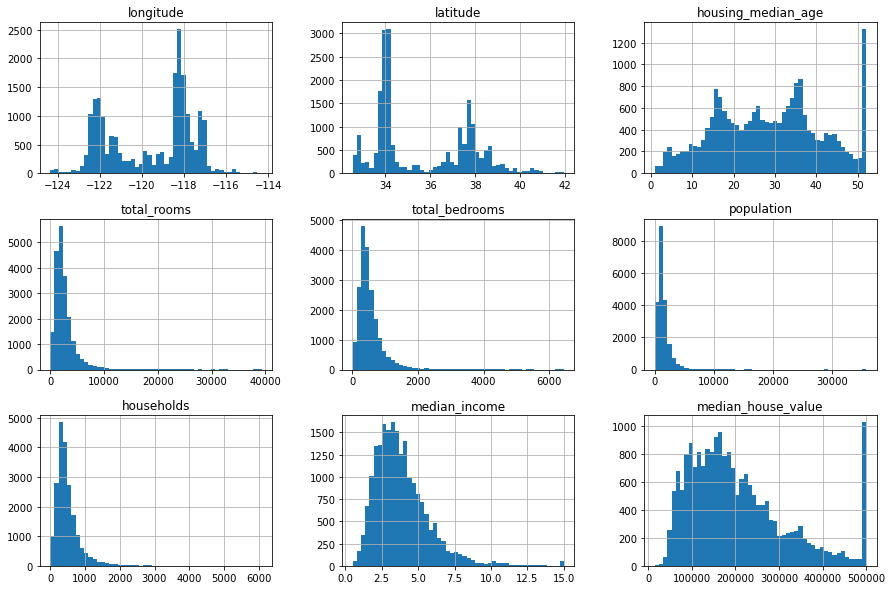

In [237]:
housing.hist(bins=50, figsize=(15,10))
plt.show()

In [238]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [239]:
import numpy as np

In [240]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

'''
Values from 0.0 (inclusive) to 1.5 (exclusive) will be labeled as category 1.
Values from 1.5 (inclusive) to 3.0 (exclusive) will be labeled as category 2.
Values from 3.0 (inclusive) to 4.5 (exclusive) will be labeled as category 3.
Values from 4.5 (inclusive) to 6.0 (exclusive) will be labeled as category 4.
Values greater than or equal to 6.0 will be labeled as category 5 due to np.inf which represents positive infinity.
'''

'\nValues from 0.0 (inclusive) to 1.5 (exclusive) will be labeled as category 1.\nValues from 1.5 (inclusive) to 3.0 (exclusive) will be labeled as category 2.\nValues from 3.0 (inclusive) to 4.5 (exclusive) will be labeled as category 3.\nValues from 4.5 (inclusive) to 6.0 (exclusive) will be labeled as category 4.\nValues greater than or equal to 6.0 will be labeled as category 5 due to np.inf which represents positive infinity.\n'

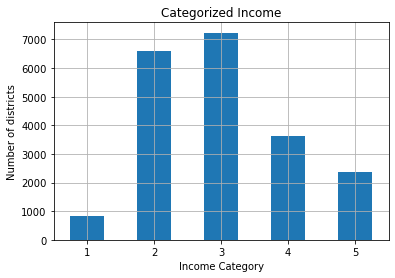

In [241]:
# For the purpose of stratified sampling i.e sampling from different income range

housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(6,4))
plt.xlabel('Income Category')
plt.ylabel('Number of districts')
plt.title('Categorized Income')
plt.show()

In [242]:
from sklearn.model_selection import StratifiedShuffleSplit

# one way to get stratified sampling, this way we can have n sets of stratified sampling
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [243]:
# another way of generating stratified sampling, this way only generates one stratified sampling
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [244]:
strat_test_set['income_cat'].value_counts().sort_index()/len(strat_test_set)

1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: income_cat, dtype: float64

In [245]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [246]:
housing = strat_test_set.copy()

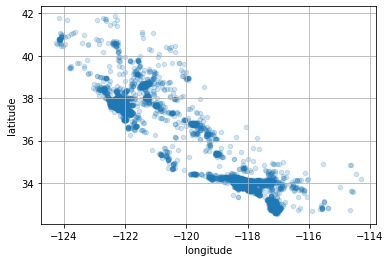

In [247]:
#alpha argument give high density data point darker colour
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show()

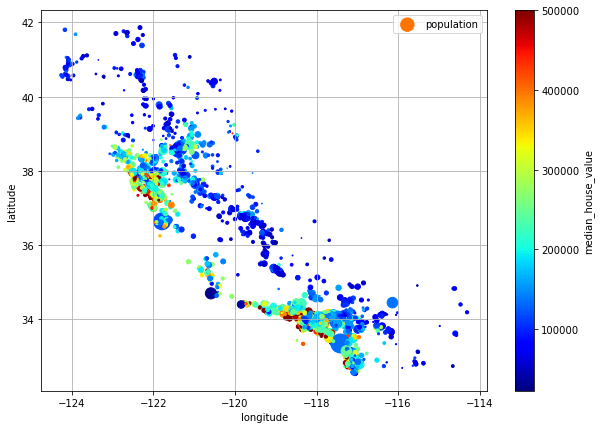

In [248]:
'''
s=housing['population']/100: The s parameter sets the size of the markers in the scatter plot. It uses the 'population' data from the housing dataset
and divides it by 100 to adjust marker sizes.

c='median_house_value': This argument defines the variable that will be represented by the color of the markers. 
In this case, the 'median_house_value' from the housing dataset is used to determine marker colors.
'''
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=housing['population']/100, label='population', c='median_house_value', cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(10,7))
plt.show()



In [249]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.926451,-0.129291,0.044672,0.075452,0.085312,0.059555,-0.009866,-0.026768
latitude,-0.926451,1.000000,0.033241,-0.033579,-0.069575,-0.086085,-0.068837,-0.086326,-0.162087
housing_median_age,-0.129291,0.033241,1.000000,-0.359397,-0.330599,-0.279408,-0.314330,-0.087699,0.118976
total_rooms,0.044672,-0.033579,-0.359397,1.000000,0.931803,0.841764,0.927997,0.199430,0.121070
total_bedrooms,0.075452,-0.069575,-0.330599,0.931803,1.000000,0.859042,0.983747,-0.014553,0.029600
population,0.085312,-0.086085,-0.279408,0.841764,0.859042,1.000000,0.884675,0.006730,-0.040286
households,0.059555,-0.068837,-0.314330,0.927997,0.983747,0.884675,1.000000,0.010658,0.043549
median_income,-0.009866,-0.086326,-0.087699,0.199430,-0.014553,0.006730,0.010658,1.000000,0.687091
median_house_value,-0.026768,-0.162087,0.118976,0.121070,0.029600,-0.040286,0.043549,0.687091,1.000000


In [250]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687091
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
longitude            -0.026768
population           -0.040286
latitude             -0.162087
Name: median_house_value, dtype: float64

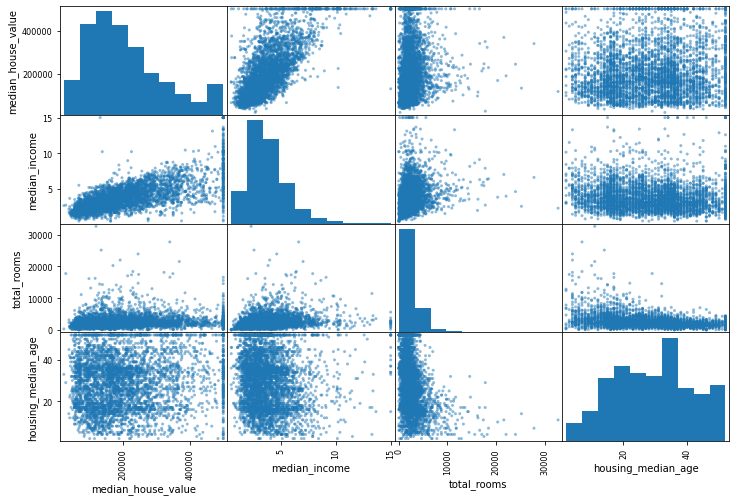

In [251]:
from pandas.plotting import scatter_matrix

#scatter_matrix takes in a list columns from a dataset - this is abit confusing
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

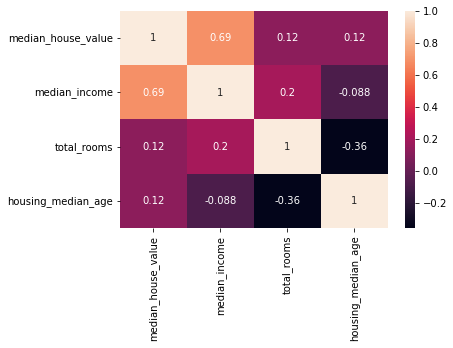

In [252]:
import seaborn as sns

# another way to visualize the correlation - better
ax = sns.heatmap(housing[attributes].corr(), annot=True)

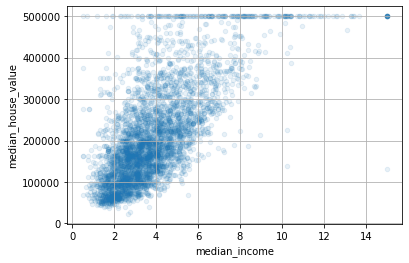

In [253]:
# median income has high positive correlation coefficient with the median house value, so can focus on it

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)
plt.show()

In [254]:
# comparing different attributes

housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [255]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687091
rooms_per_house       0.198322
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
people_per_house     -0.025974
longitude            -0.026768
population           -0.040286
latitude             -0.162087
bedrooms_ratio       -0.254506
Name: median_house_value, dtype: float64

In [256]:
# revert to the clean dataset
housing = strat_train_set.drop('median_house_value', axis=1)

In [257]:
housing_label = strat_train_set['median_house_value'].copy()

In [258]:
# refer back to book pg 68
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [259]:
# to include only numeric attributes from the dataset
housing_num = housing.select_dtypes(include=[np.number])

In [260]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [261]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [262]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [263]:
X = imputer.transform(housing_num)

In [264]:
# transformed housing dataset with median to fill missing value
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [265]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [266]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [267]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [268]:
# onehotencoder useful when the text cannot use number to represent their relationship
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [269]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [270]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [271]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [272]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [273]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [274]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [275]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

In [276]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_label.to_frame())

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5] # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [277]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [278]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [279]:
from sklearn.pipeline import make_pipeline

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [280]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [281]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape


(16512, 24)

In [282]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Recreating all the graphs

In [222]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


### figure 2-9 Histogram of income categories

In [223]:
# first create a new column to bin income into categories
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0,1.5,3,4.5,6,np.inf],
                               labels=[1,2,3,4,5])

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,3


In [224]:
cat_income = housing['income_cat'].value_counts()
cat_income

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

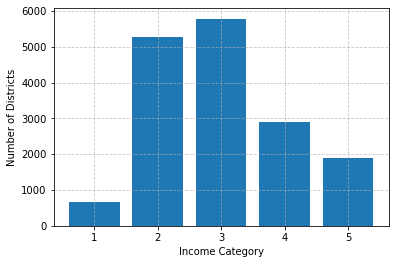

In [225]:
plt.bar(cat_income.index, cat_income)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlabel('Income Category')
plt.ylabel('Number of Districts')

plt.show()

### Figure 2-11 Geographical Scatterplot of data

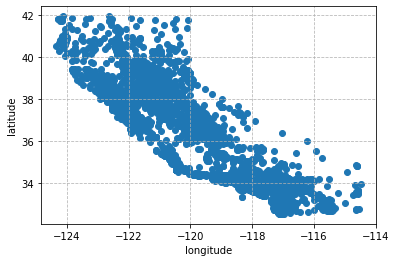

In [226]:
plt.scatter(data=housing, x='longitude', y='latitude')

plt.grid(axis='both', linestyle='--', alpha=0.9)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

### Figure 2-12 Better visualization of figure 2-11

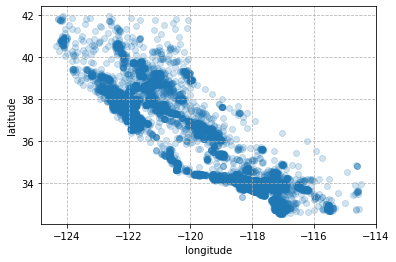

In [227]:
plt.scatter(data=housing, x='longitude', y='latitude', alpha=0.2)

plt.grid(axis='both', linestyle='--', alpha=0.9)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

### Figure 2-13 Better visualization than 2-12 with colormap

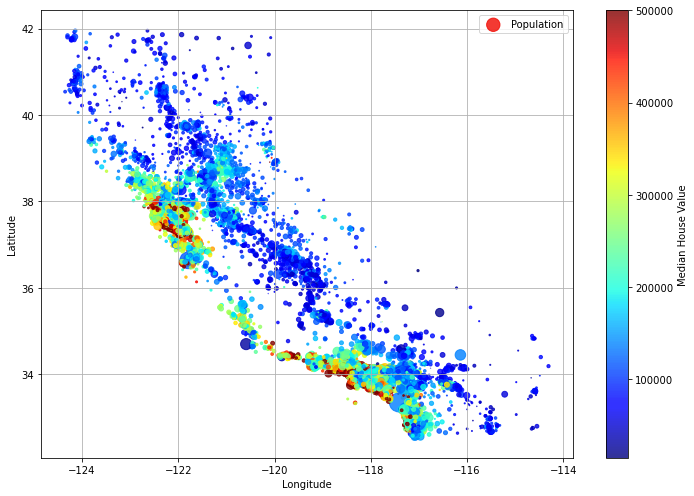

In [306]:
housing = load_housing_data()

plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    x=housing["longitude"],
    y=housing["latitude"],
    alpha=0.8, #alpha controls concentrated of colours
    s=housing["population"] / 100,
    c=housing["median_house_value"],
    cmap="jet",
    label='Population'
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

colorbar = plt.colorbar(scatter, label="Median House Value")
colorbar.set_label("Median House Value")

plt.grid(axis="both")

plt.legend()

plt.tight_layout()
plt.show()

### Figure 2-15 Median income vs median house value

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


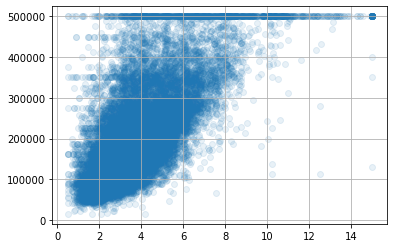

In [ ]:
plt.scatter(data=housing, x='median_income', y='median_house_value', alpha=0.1)

plt.grid(axis='both')

plt.show()

### Figure 2-17 Transforming feature to make it close to Gaussian distribution

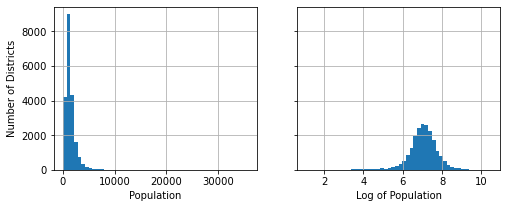

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axs[0].hist(housing['population'], bins=50)
axs[1].hist(housing['population'].apply(np.log), bins=50)

axs[0].set_xlabel('Population')
axs[1].set_xlabel('Log of Population')
axs[0].set_ylabel('Number of Districts')

axs[0].grid(axis='both')
axs[1].grid(axis='both')



plt.show()

### Figure 2-18 Gaussian RBF feature measuring the similarity between housing median age and 35

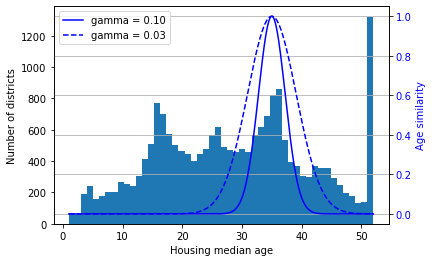

In [ ]:
# linspace create equal spacing between max and min value
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1,1)

gamma1 = 0.1
gamma2 = 0.03

rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx() # create a twin axis that shares the same x-axis
ax2.plot(ages, rbf1, color='blue', label='gamma = 0.10')
ax2.plot(ages, rbf2, color='blue', label='gamma = 0.03', linestyle='--')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel("Age similarity", color='blue')

plt.grid(axis='both')

plt.legend()

plt.show()

### Figure 2-19 Gaussian RBF similarity to the nearest cluster center

In [284]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [285]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

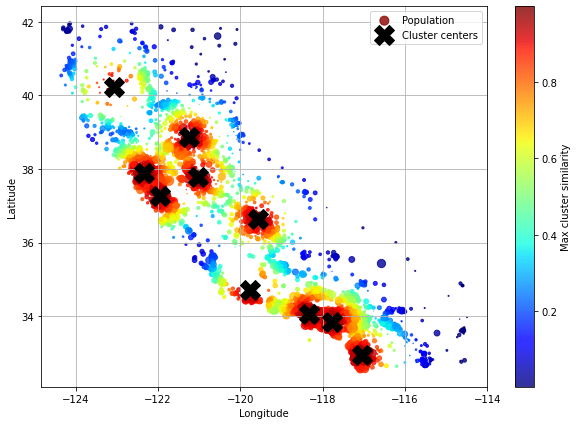

In [302]:
plt.figure(figsize=(10,7))

scatter = plt.scatter(data=housing_renamed, 
            x='Longitude', 
            y='Latitude',
            alpha=0.8,
            s=housing['population']/100,
            c='Max cluster similarity',
            cmap='jet',
            label='Population'
            )

colorbar = plt.colorbar(scatter)
colorbar.set_label("Max cluster similarity")

plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(axis='both')

plt.legend()

plt.show()
